In [98]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint as sp_randint
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from lightgbm import *

In [99]:
train_df = pd.read_csv('train.csv')
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [100]:
test_df = pd.read_csv('test.csv')
test_df.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [101]:
var_columns = [c for c in train_df.columns if c not in ['ID_code','target']]

X = train_df.loc[:,var_columns]
y = train_df.loc[:,'target']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((140000, 200), (60000, 200), (140000,), (60000,))

In [102]:
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid)

In [103]:
parameters = {'objective': 'binary',
              'metric': 'auc',
              'is_unbalance': 'true',
              'boosting': 'gbdt',
              'num_leaves': 63,
              'feature_fraction': 0.5,
              'bagging_fraction': 0.5,
              'bagging_freq': 20,
              'learning_rate': 0.01,
              'verbose': -1
             }

In [104]:
#Training the model
model_lgbm = lgb.train(parameters,
                            train_data,
                            valid_sets=valid_data,
                            num_boost_round=5000,
                            early_stopping_rounds=50)

C:\Users\shind\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.651557
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.680536
[3]	valid_0's auc: 0.703495
[4]	valid_0's auc: 0.710722
[5]	valid_0's auc: 0.720287
[6]	valid_0's auc: 0.734537
[7]	valid_0's auc: 0.73861
[8]	valid_0's auc: 0.749292
[9]	valid_0's auc: 0.756036
[10]	valid_0's auc: 0.761436
[11]	valid_0's auc: 0.766823
[12]	valid_0's auc: 0.769314
[13]	valid_0's auc: 0.77337
[14]	valid_0's auc: 0.776446
[15]	valid_0's auc: 0.777168
[16]	valid_0's auc: 0.777517
[17]	valid_0's auc: 0.778281
[18]	valid_0's auc: 0.778477
[19]	valid_0's auc: 0.77879
[20]	valid_0's auc: 0.780232
[21]	valid_0's auc: 0.783429
[22]	valid_0's auc: 0.784647
[23]	valid_0's auc: 0.78505
[24]	valid_0's auc: 0.787003
[25]	valid_0's auc: 0.788386
[26]	valid_0's auc: 0.789752
[27]	valid_0's auc: 0.790317
[28]	valid_0's auc: 0.790399
[29]	valid_0's auc: 0.791893
[30]	valid_0's auc: 0.792414
[31]	valid_0's auc: 0.794002
[32]	valid_0's auc: 0.79395
[33]	valid_0's auc: 0.795

In [105]:
#Computing AUC scores for training and validation set
y_train_pred = model_lgbm.predict(X_train)
y_valid_pred = model_lgbm.predict(X_valid)

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred)*100,
                                                    roc_auc_score(y_valid, y_valid_pred)*100))

AUC Train: 99.3896
AUC Valid: 89.4226


In [106]:
#df_sample_submission.to_csv("04_lgbm_scores.csv", index=False)

In [107]:
y_pred = model_lgbm.predict(X_valid)
y_pred

array([0.00181857, 0.07855437, 0.0381096 , ..., 0.77451549, 0.02037716,
       0.21094323])

In [108]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [109]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_valid)

In [110]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_valid)
print('LightGBM accuracy score: {0:0.4f}'.format(accuracy_score(y_valid, y_pred)*100))

LightGBM accuracy score: 90.6350


In [111]:
# Training set score
y_pred_train = clf.predict(X_train)
print('LightGBM Model training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)*100))
# Testing set score
accuracy=accuracy_score(y_pred, y_valid)
print('LightGBM Model testing-set accuracy score: {0:0.4f}'.format(accuracy_score(y_valid, y_pred)*100))

LightGBM Model training-set accuracy score: 91.8721
LightGBM Model testing-set accuracy score: 90.6350


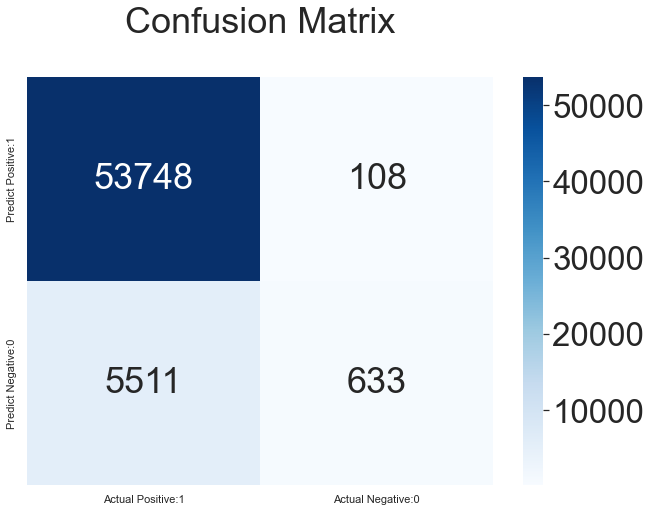

In [112]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=3.0) 
label_font = {'size':'15'} 
cm = confusion_matrix(y_valid, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix\n")
plt.tight_layout()

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     53856
           1       0.85      0.10      0.18      6144

    accuracy                           0.91     60000
   macro avg       0.88      0.55      0.57     60000
weighted avg       0.90      0.91      0.87     60000



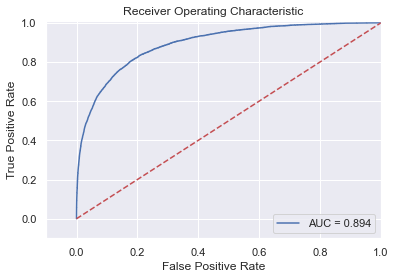

In [114]:
#ROC Curve
sns.set(font_scale=1.0) 
label_font = {'size':'5'} 
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_pred)
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [115]:
#Running the model thru test set to predict the data
X_test = test_df.loc[:,var_columns]
df_sample_submission['target'] = model_lgbm.predict(X_test)
df_sample_submission

,ID_code,target
0,test_0,0.348479
1,test_1,0.484587
2,test_2,0.452738
3,test_3,0.432902
4,test_4,0.177944
...,...,...
199995,test_199995,0.174409
199996,test_199996,0.018742
199997,test_199997,0.007476
199998,test_199998,0.269068
